# Data Types and Missing Values
Deal with the most common progress-bloking problems

In [1]:
import pandas as pd
import numpy as np

wine_data = 'https://raw.githubusercontent.com/lju-lazarevic/wine/refs/heads/master/data/winemag-data-130k-v2.csv'
reviews = pd.read_csv(wine_data)

### Introduction

In this tutorial, you'll learn how to investigate data types within a SataFrame of Series. You'll also learn how to find and replace entries.

### Dtypes

The data type for a column in a DataFrame or a Series isn known as the `dtype`.

You can use the `dtype` property to grab the type of a specific column. For instance, we can get the *dtype* of the `price` column in the `reviews` DataFrame: 

In [4]:
reviews.price.dtype

dtype('float64')

Alternatively, the `dtypes` property returns the `dtype` of every column in the DataFrame:

In [5]:
reviews.dtypes

id                         int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dupe?                    float64
dtype: object

Data types tell us something about how pandas is storing the data internally. `float64` means that it's using a 64-bit floating point number; `int64` means a similarly sized integer instead, and so on.

One peculiarity to keep in mind (and on display very celarly here) is that columns cosisting entirely of strings do not get their own type; they are instead given the `object` type.

It's possible to convert a column of one type into another wherever such a conversion makes sense by using `astype()` function. For example, we may transform the `points` column from its existing `int64` data type into a `float64` data type:

In [7]:
reviews.points.astype('float64')

0         85.0
1         87.0
2         86.0
3         86.0
4         87.0
          ... 
119983    90.0
119984    88.0
119985    90.0
119986    87.0
119987    90.0
Name: points, Length: 119988, dtype: float64

A DataFrame or Series ***index*** has its own `dtype`, too:

In [8]:
reviews.index.dtype

dtype('int64')

Pandas also supports more exotic data types, such as categorical data and timeseries data. Because these data types are more rarely used, we will omit them until a much later section of this tuturial.

### Missing Data

Entries missing values are given the value `NaN`, short for **"Not a Number"**. For technical reasons these `NaN` values are always of the `float64` dtype.

Pandas provides some methods specific to missing data. To select `NaN` entries you can use `pd.isnull()` (or its companion `pd.notnull()`). This is meant to be used thusly:

In [ ]:
# To show the NaN rows
reviews[pd.isnull(reviews.country)].head()

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,dupe?
1938,129590,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Büyülübağ 2012 Shah Red,Red Blend,Büyülübağ,NaN
2088,11150,NaN,"A blend of 85% Melnik, 10% Grenache Noir and 5...",NaN,89,20.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Orbelus 2013 Melnik,Melnik,Orbelus,NaN
3857,46352,NaN,"A dark color and rich, jammy, baked aromas of ...",Catalina,91,50.0,NaN,NaN,NaN,Michael Schachner,@wineschach,Santa Ema 2014 Catalina Red,Red Blend,Santa Ema,NaN
6779,105167,NaN,"A lively whiff of white blossom, Muscat grapes...",Steirische Klassik,92,21.0,NaN,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Neumeister 2016 Steirische Klassik Gelber Musk...,Gelber Muskateller,Neumeister,NaN
7349,85821,NaN,A neutral nose leads onto an apple-fresh palat...,Steirische Klassik,90,22.0,NaN,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Neumeister 2015 Steirische Klassik Morillon,Morillon,Neumeister,NaN


In [12]:
reviews.country.isnull().sum()

np.int64(59)

Replacing missing values is a common operation. Pandas provides a really handy method for this problem: `fillna()`. ***fillna()*** provides a few different strategies for mitigating such data. For example, we can simply replace each `NaN` with an `"Unknown"`:

In [13]:
reviews.region_2.fillna("Unknown")

0                  Unknown
1              North Coast
2         California Other
3                  Unknown
4                  Unknown
                ...       
119983             Unknown
119984             Unknown
119985             Unknown
119986    Sierra Foothills
119987             Unknown
Name: region_2, Length: 119988, dtype: object

Or we could fill each missing value with the first non-null value that appears sometime after the given record in the database. This is known as the backfill strategy.

Alternatively, we may have a non-null value that we would like to replace. For example, suppose that since this dataset was published, reviewer ***Kerin O'Keefe*** has changed her Twitter handke from `@kerinokeefe` to `@kerino`. One way to reflect this in the dataset is using the `replace()` method:

In [19]:
reviews.taster_twitter_handle.replace('@kerinokeefe', '@kerino', inplace=True)

In [21]:
reviews.query('taster_twitter_handle == "@kerino"')['taster_twitter_handle']

28        @kerino
705       @kerino
819       @kerino
822       @kerino
823       @kerino
           ...   
119735    @kerino
119743    @kerino
119773    @kerino
119818    @kerino
119868    @kerino
Name: taster_twitter_handle, Length: 9697, dtype: object

The `replace()` method is worth mentioning here because it's handy for replacing missing data which is given some kind of sentinel value in the dataset: things like `"Unknown"`, `"Undisclosed"`, `"Invalid"`, and so on.

# Practice - Exercise

### 1. What is the data type of the `points` column in the dataset?

In [22]:
reviews.points.dtype

dtype('int64')

### 2. Create a Series from entries in the points column, but convert the entries to strings. Hint: strings are str in native Python.

In [28]:
points_string = reviews.points.astype(str)

In [29]:
points_string.dtype

dtype('O')

### 3. Sometimes the price column is null. How many reviews in the dataset are missing a price?

In [31]:
reviews.price.isnull().sum()

np.int64(8395)

### 4. What are the most common wine-producing regions? Create a Series counting the number of times each value occurs in the region_1 field. This field is often missing data, so replace missing values with Unknown. Sort in descending order. Your output should look something like this:

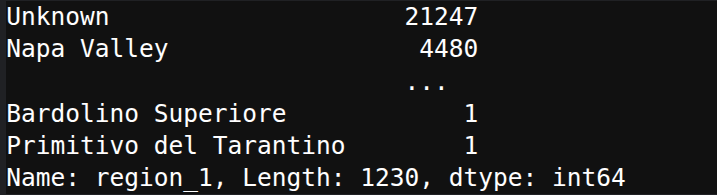

In [36]:
reviews.region_1.isna().sum()

np.int64(19560)

In [51]:
reviews.region_1.fillna('Unknown', inplace=True)

In [52]:
reviews_per_region = reviews.groupby('region_1')['region_1'].count().sort_values(ascending=False)


In [53]:
reviews_per_region

region_1
Unknown                                              19560
Napa Valley                                           4174
Columbia Valley (WA)                                  3795
Russian River Valley                                  2862
California                                            2468
                                                     ...  
Custoza Superiore                                        1
Vino de Calidad de Tierras de León                       1
Altos de Mendoza                                         1
Vino de la Tierra Contraviesa Alpujarra                  1
Vino de la Tierra Ribera del Gállego-Cinco Villas        1
Name: region_1, Length: 1230, dtype: int64